In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
 
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
 
import cv2
import warnings
warnings.filterwarnings('ignore')

# Directory clearing code

In [34]:
import os

# Define paths
sample_dir_0 = 'sample_val/0'
sample_dir_1 = 'sample_val/1'

# Delete files in sample/0 directory
for filename in os.listdir(sample_dir_0):
    file_path = os.path.join(sample_dir_0, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)

# Delete files in sample/1 directory
for filename in os.listdir(sample_dir_1):
    file_path = os.path.join(sample_dir_1, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)


# One Vs Rest Approach

**The following code simultaneously generate the new directories taking one animal at a time giving it a label 1 and all other animals as 0 and generates two directories sample and sample_val for training and validation of the respective model for that animal. Once trainig and evaluation is done directories are cleared and model is saved. Similar process is being continued for the rest 89 animals which ultimately gives us 90 models, one each for a specific animal.**

It was not possible for me to run this cell because of computational inefficiency therefore i have i shown the performance of a single model for hippotomus class

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Define constants

img_width, img_height = 512, 512
batch_size = 32
num_classes = 90  # Adjust this according to the number of classes (subfolders) you have in your dataset

# Define your CNN model
def create_model(input_shape, num_classes):
    
    shape=input_shape
    
    # Define the input layer
    inputs = tf.keras.Input(shape=shape)
    
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=shape))
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    
    loss_function = tf.keras.losses.BinaryCrossentropy()
    
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    
    model.summary()
    
    return model

# Creating separate models for each class using OvR strategy
models_ovr = []
for class_label in range(num_classes):  # num_classes = 90
    # Define paths
    original_data_dir = 'train'
    sample_dir = 'sample'

    # Create sample directory if it doesn't exist
    if not os.path.exists(sample_dir):
        os.makedirs(sample_dir)

    # Copy images from folders '0' to '88' to 'sample/0'
    for i in range(90):
        if i!=class_label:
            src_dir = os.path.join(original_data_dir, str(i))
            if os.path.exists(src_dir):  # Check if the source directory exists
                dest_dir = os.path.join(sample_dir, '0')  # Destination directory for '0'
                if not os.path.exists(dest_dir):
                    os.makedirs(dest_dir)
                for filename in os.listdir(src_dir):
                    src_file = os.path.join(src_dir, filename)
                    dest_file = os.path.join(dest_dir, filename)
                    shutil.copy(src_file, dest_file)

    # Copy images from folder '89' to 'sample/1'
    src_dir = os.path.join(original_data_dir, str(class_label))
    if os.path.exists(src_dir):  # Check if the source directory exists
        dest_dir = os.path.join(sample_dir, '1')  # Destination directory for '1'
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        for filename in os.listdir(src_dir):
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.copy(src_file, dest_file)
            
    # Define paths
    original_data_dir = 'test'
    sample_dir = 'sample_val'

    # Create sample directory if it doesn't exist
    if not os.path.exists(sample_dir):
        os.makedirs(sample_dir)

    # Copy images from folders '0' to '88' to 'sample_val/0'
    for i in range(90):
        if i!=class_label:
            src_dir = os.path.join(original_data_dir, str(i))
            if os.path.exists(src_dir):  # Check if the source directory exists
                dest_dir = os.path.join(sample_dir, '0')  # Destination directory for '0'
                if not os.path.exists(dest_dir):
                    os.makedirs(dest_dir)
                for filename in os.listdir(src_dir):
                    src_file = os.path.join(src_dir, filename)
                    dest_file = os.path.join(dest_dir, filename)
                    shutil.copy(src_file, dest_file)

    # Copy images from folder '89' to 'sample_val/1'
    src_dir = os.path.join(original_data_dir, str(class_label))
    if os.path.exists(src_dir):  # Check if the source directory exists
        dest_dir = os.path.join(sample_dir, '1')  # Destination directory for '1'
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        for filename in os.listdir(src_dir):
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.copy(src_file, dest_file)
            
    print(list)
    
    model = create_model(input_shape=(img_width, img_height, 3), num_classes=2)  # Binary classification
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Create image data generator for current class
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    
    train_data_dir = 'sample'
    validation_data_dir = 'sample_val'
    
    train_generator = train_datagen.flow_from_directory(
        directory=train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary'
    )
    
    # Assuming you have a validation directory as well
    validation_generator = train_datagen.flow_from_directory(
        directory=validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary'# Because we are doing binary classification
    )
    
    # Train the model using generator
    model.fit(train_generator, epochs=10, validation_data=validation_generator)
    models_ovr.append((class_label,model))
    
    model.save(f'model{class_label}.h5') 
    
    sample_dir_0 = 'sample/0'
    sample_dir_1 = 'sample/1'
    
    # Delete files in sample/0 directory
    for filename in os.listdir(sample_dir_0):
        file_path = os.path.join(sample_dir_0, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

    # Delete files in sample/1 directory
    for filename in os.listdir(sample_dir_1):
        file_path = os.path.join(sample_dir_1, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    
    sample_dir_0 = 'sample_val/0'
    sample_dir_1 = 'sample_val/1'
    
    # Delete files in sample/0 directory
    for filename in os.listdir(sample_dir_0):
        file_path = os.path.join(sample_dir_0, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

    # Delete files in sample/1 directory
    for filename in os.listdir(sample_dir_1):
        file_path = os.path.join(sample_dir_1, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)


# Evaluate the OvR models
for idx, model in enumerate(models_ovr):
    print(f"Evaluating model for class {idx}")
    model.evaluate(test_generator)


In [14]:
models_ovr[0]

# Cumulative Prediction for One Vs Rest

In [ ]:
def ensemble_predict(test_image_vector, models_ovr):
    for class_label, model in models_ovr:
        prediction = np.argmax(model.predict(test_image_vector))
        if prediction == 1:  # Assuming 1 is the positive class
            return class_label  # Return the class label
    # If none of the models predict class 1, return None or handle the case where no class is predicted
    return None

from keras.preprocessing import image
import numpy as np

# Path to the test image
test_image_path = '/Users/guptatilak/Documents/OneVsRest/sample_val/1/2b75b8692d.jpg'

# Load the test image
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

# Convert the image to an array
test_image_array = image.img_to_array(test_image)

# Create image data generator for test image
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Apply transformations to the test image array
test_image_array = test_datagen.standardize(test_image_array)

test_image_array = np.expand_dims(test_image_array, axis=0)

# Now, test_image_array is ready to be used for prediction with the CNN model.

# models_ovr is a list containing tuples of class label and model
predicted_class_label = ensemble_predict(test_image_, models_ovr)
if predicted_class_label is not None:
    print("Predicted class:", predicted_class_label)
else:
    print("None of the models predicted a class.")


# Model 1

In [97]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def stem_block(inputs, input_shape=(512, 512, 3)):
    # Stem module
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu')(inputs)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu')(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
    x = layers.Conv2D(80, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu')(x)
    x = layers.Conv2D(192, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
    return x

def reduction_block(inputs):
    # Reduction block
    branch3x3 = layers.Conv2D(384, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu')(inputs)
    branch3x3_2 = layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(branch3x3)
    branch_pool = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(inputs)
    x = layers.Concatenate(axis=-1)([branch3x3_2, branch_pool])
    return x

def model_block(inputs, input_shape=(512,512,3), scale=1.0, activation='relu'):
    # Inception-ResNet block
    branch1x1 = layers.Conv2D(32, kernel_size=(1, 1), strides=(1, 1), padding='same', activation=activation)(inputs)

    branch3x3 = layers.Conv2D(32, kernel_size=(1, 1), strides=(1, 1), padding='same', activation=activation)(inputs)
    branch3x3 = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation=activation)(branch3x3)

    branch5x5 = layers.Conv2D(32, kernel_size=(1, 1), strides=(1, 1), padding='same', activation=activation)(inputs)
    branch5x5 = layers.Conv2D(48, kernel_size=(3, 3), strides=(1, 1), padding='same', activation=activation)(branch5x5)
    branch5x5 = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation=activation)(branch5x5)

    branch_pool = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    branch_pool = layers.Conv2D(32, kernel_size=(1, 1), strides=(1, 1), padding='same', activation=activation)(branch_pool)

    concat = layers.Concatenate(axis=-1)([branch1x1, branch3x3, branch5x5, branch_pool])
    
    # Adjust dimensions of residual connection if necessary
    residual = layers.Conv2D(192, kernel_size=(1, 1), strides=(1, 1), padding='same')(inputs)
    
    # Ensure compatibility of shapes
    residual = layers.Conv2D(160, kernel_size=(1, 1), strides=(1, 1), padding='same')(residual)
    
    x = layers.Add()([residual * scale, concat])
    return x

def inception_resnet_v2(input_shape=(512, 512, 3), num_classes=2):
    inputs = tf.keras.Input(shape=input_shape)  # Input shape defined here
    x = stem_block(inputs, input_shape=input_shape)
    
    # Inception-ResNet blocks
    # for _ in range(3):  # Example: Repeat 5 times
    x = model_block(x, input_shape=input_shape)
    
    x = reduction_block(x)
    
    # for _ in range(3):  # Example: Repeat 2 times
    x = model_block(x, input_shape=input_shape)
    
    x = reduction_block(x)
    
    # for _ in range(3):  # Example: Repeat 5 times
    x = model_block(x, input_shape=input_shape)
    
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification
    
    model = Model(inputs, outputs)
    return model

# Example usage
model = inception_resnet_v2(input_shape=(512, 512, 3), num_classes=1)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_108 (Conv2D)         (None, 255, 255, 32)         896       ['input_4[0][0]']             
                                                                                                  
 conv2d_109 (Conv2D)         (None, 253, 253, 32)         9248      ['conv2d_108[0][0]']          
                                                                                                  
 conv2d_110 (Conv2D)         (None, 253, 253, 64)         18496     ['conv2d_109[0][0]']          
                                                                                            

# Model Architecture

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(512, 512, 3)))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))


loss_function = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 conv2d_39 (Conv2D)          (None, 510, 510, 16)      4624      
                                                                 
 dropout_28 (Dropout)        (None, 510, 510, 16)      0         
                                                                 
 conv2d_40 (Conv2D)          (None, 510, 510, 16)      2320      
                                                                 
 conv2d_41 (Conv2D)          (None, 510, 510, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 255, 255, 32)      0         
 g2D)                                                            
                                                      

# Stratified 3 Fold Cross Validation

**This technique can be implemented in the above overall model training code, provided the machine requirements are satisfied. I have shown this for a single for the same reason.**

In [60]:
# Define paths
data_dir = '/Users/guptatilak/Documents/OneVsRest/sample'
batch_size = 32
target_size = (512, 512)

# Create a DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'animal_name': animal_names,
    'label': labels
})
# df['image_path'] = df['image_path'].str.replace(r'animals\\', '')

# Initialize lists to store data
image_paths = []
animal_names = []
labels = []

# Traverse through each subfolder (animal category)
for label, animal_folder in enumerate(os.listdir(data_dir)):
    animal_path = os.path.join(data_dir, animal_folder)
    # Skip files that are not directories
    if not os.path.isdir(animal_path):
        continue
    # Iterate over images in the subfolder
    for image_name in os.listdir(animal_path):
        image_paths.append(os.path.join(animal_path, image_name))
        animal_names.append(animal_folder)
        labels.append(label)

In [61]:
df

,image_path,animal_name,label
0,/Users/guptatilak/Documents/OneVsRest/sample/0...,0,1
1,/Users/guptatilak/Documents/OneVsRest/sample/0...,0,1
2,/Users/guptatilak/Documents/OneVsRest/sample/0...,0,1
3,/Users/guptatilak/Documents/OneVsRest/sample/0...,0,1
4,/Users/guptatilak/Documents/OneVsRest/sample/0...,0,1
...,...,...,...
4317,/Users/guptatilak/Documents/OneVsRest/sample/1...,1,2
4318,/Users/guptatilak/Documents/OneVsRest/sample/1...,1,2
4319,/Users/guptatilak/Documents/OneVsRest/sample/1...,1,2
4320,/Users/guptatilak/Documents/OneVsRest/sample/1...,1,2


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import StratifiedKFold

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
    
data_dir = '/Users/guptatilak/Documents/OneVsRest/sample'
    
# Assuming you have a list of all filenames and their corresponding labels
# Replace this with your actual data loading mechanism
all_filenames = df['image_path'].tolist()  # List of all filenames
all_labels = df['animal_name'].astype(float).tolist()  # List of all corresponding labels

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

models=[]
for fold_index, (train_index, val_index) in enumerate(skf.split(all_filenames, all_labels)):
    print(f"Fold {fold_index+1}")
    train_filenames, val_filenames = [all_filenames[i] for i in train_index], [all_filenames[i] for i in val_index]
    train_labels, val_labels = [all_labels[i] for i in train_index], [all_labels[i] for i in val_index]

    train_df = pd.DataFrame({'image_path': train_filenames, 'animal_name': train_labels})
    val_df = pd.DataFrame({'image_path': val_filenames, 'animal_name': val_labels})

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=data_dir,
        x_col='image_path',
        y_col='animal_name',
        target_size=(512, 512),
        batch_size=32,
        class_mode='raw'  # Corrected class mode for categorical classification
    )
    
    validation_generator = train_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=data_dir,
        x_col='image_path',
        y_col='animal_name',
        target_size=(512, 512),
        batch_size=32,
        class_mode='raw'  # Corrected class mode for categorical classification
    )
    

    # Assuming you have already defined and compiled your model
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer = Adam()

    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    # Fit the model for this fold
    model.fit(train_generator, epochs=5, validation_data=validation_generator)
    models.append(model)


Fold 1
Found 2878 validated image filenames.
Found 1441 validated image filenames.
Epoch 1/5
90/90 [==============================] - 873s 10s/step - loss: 0.0000e+00 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 0.9882
Epoch 2/5
90/90 [==============================] - 987s 11s/step - loss: 0.0000e+00 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 0.9882
Epoch 3/5
90/90 [==============================] - 3462s 39s/step - loss: 0.0000e+00 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 0.9882
Epoch 4/5
90/90 [==============================] - 1039s 12s/step - loss: 0.0000e+00 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 0.9882
Epoch 5/5
90/90 [==============================] - 1047s 12s/step - loss: 0.0000e+00 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 0.9882
Fold 2
Found 2880 validated image filenames.
Found 1439 validated image filenames.
Epoch 1/5
90/90 [==============================] - 910s 10s/step - loss: 0.0000e+00 - 

# Classification Metrics for One vs Rest

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define paths
data_dir = '/Users/guptatilak/Documents/OneVsRest/sample_val'
batch_size = 32
target_size = (512, 512)

# Create a DataFrame
test_df = pd.DataFrame({
    'image_path': image_paths,
    'animal_name': animal_names,
    'label': labels
})

# Remove rows with missing data
test_df.dropna(inplace=True)

# Initialize lists to store data
image_paths = []
animal_names = []
labels = []

# Traverse through each subfolder (animal category)
for label, animal_folder in enumerate(os.listdir(data_dir)):
    animal_path = os.path.join(data_dir, animal_folder)
    # Skip files that are not directories
    if not os.path.isdir(animal_path):
        continue
    # Iterate over images in the subfolder
    for image_name in os.listdir(animal_path):
        image_paths.append(os.path.join(animal_path, image_name))
        animal_names.append(animal_folder)
        labels.append(label)

# Assuming you have a test dataset and corresponding labels
test_filenames = test_df['image_path'].tolist()  # List of test filenames
test_labels = test_df['animal_name'].astype(float).tolist()  # List of corresponding test labels
test_labels=test_labels[:-2]

# Initialize empty lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model trained using k-fold cross-validation
for model in models:
    # Make predictions on the test dataset
    test_generator = train_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=data_dir,
        x_col='image_path',
        y_col='label',
        target_size=(512, 512),
        batch_size=32,
        class_mode='raw',
        shuffle=False  # Important to keep the order of predictions consistent with labels
    )
    
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = precision_score(test_labels, predicted_labels, average='macro')
    recall = recall_score(test_labels, predicted_labels, average='macro')
    f1 = f1_score(test_labels, predicted_labels, average='macro')
    
    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate mean of evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print overall assessment metrics
print("Overall Assessment Metrics:")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-score: {mean_f1}")

Found 1072 validated image filenames.
34/34 [==============================] - 29s 836ms/step
Found 1072 validated image filenames.
34/34 [==============================] - 29s 837ms/step
Found 1072 validated image filenames.
34/34 [==============================] - 29s 840ms/step
Overall Assessment Metrics:
Mean Accuracy: 0.9906716417910447
Mean Precision: 0.49533582089552236
Mean Recall: 0.5
Mean F1-score: 0.4976569821930647


In [83]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Path to your test image
test_image_path = 'sample_val/1/2b75b8692d.jpg'

# Load the test image
test_image = image.load_img(test_image_path, target_size=(512, 512))

# Convert the image to an array
test_image_array = image.img_to_array(test_image)

# Apply other transformations similar to training data generator
# Create image data generator for test image
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Apply transformations to the test image array
test_image_array = np.expand_dims(test_image_array, axis=0)  # Adding batch dimension
test_image_array = test_datagen.standardize(test_image_array)

# Make prediction
prediction = model.predict(test_image_array)

print(prediction)


1/1 [==============================] - 0s 179ms/step
[[0.]]


                                          image_path
0  /Users/guptatilak/Documents/OneVsRest/sample_v...
1  /Users/guptatilak/Documents/OneVsRest/sample_v...
2  /Users/guptatilak/Documents/OneVsRest/sample_v...
3  /Users/guptatilak/Documents/OneVsRest/sample_v...
4  /Users/guptatilak/Documents/OneVsRest/sample_v...
Found 1072 validated image filenames.
34/34 [==============================] - 10s 300ms/step


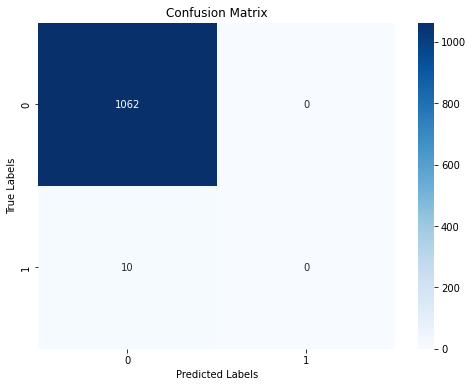

In [85]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

# Define paths
data_dir = '/Users/guptatilak/Documents/OneVsRest/sample_val'
batch_size = 32
target_size = (512, 512)

image_paths = []
animal_names = []
labels = []

# Traverse through each subfolder (animal category)
for label, animal_folder in enumerate(os.listdir(data_dir)):
    animal_path = os.path.join(data_dir, animal_folder)
    # Skip files that are not directories
    if not os.path.isdir(animal_path):
        continue
    # Iterate over images in the subfolder
    for image_name in os.listdir(animal_path):
        image_paths.append(os.path.join(animal_path, image_name))
        animal_names.append(animal_folder)
        labels.append(label)

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'animal_name': animal_names,
    'label': labels
})

# Define test filenames and labels
test_filenames = df['image_path'].tolist()
test_labels = df['animal_name'].astype(float).tolist()

# Directory containing your test images
test_data_dir = '/Users/guptatilak/Documents/OneVsRest/sample_val'

# Create a DataFrame from the collected file paths
test_df = pd.DataFrame({'image_path': test_filenames})

# Display the first few rows of the DataFrame
print(test_df.head())

test_datagen = ImageDataGenerator(rescale=1./255)  # You may need to adjust other parameters here

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_data_dir,  # Directory where test images are stored
    x_col='image_path',  # Column name containing the image file paths
    y_col=None,  # Since it's the test set, there are no labels
    target_size=target_size,  # Resizing images to match your model's input size
    batch_size=batch_size,
    class_mode=None,  # Since it's the test set, there are no labels
    shuffle=False  # Do not shuffle the test set
)

# Generate predictions for the test set
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Make sure both test_labels and predicted_labels have the same number of samples
test_labels = df['animal_name'].astype(int).tolist()  # Ensure integer type
test_labels = test_labels[:len(predicted_labels)]  # Align the lengths

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Convolutional Layer Visualization

In [86]:
for i in range(len(model.layers)):
    # check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # get filter weights
    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d_38 (3, 3, 3, 32)
layer number 1 conv2d_39 (3, 3, 32, 16)
layer number 3 conv2d_40 (3, 3, 16, 16)
layer number 4 conv2d_41 (3, 3, 16, 32)


In [87]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [88]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

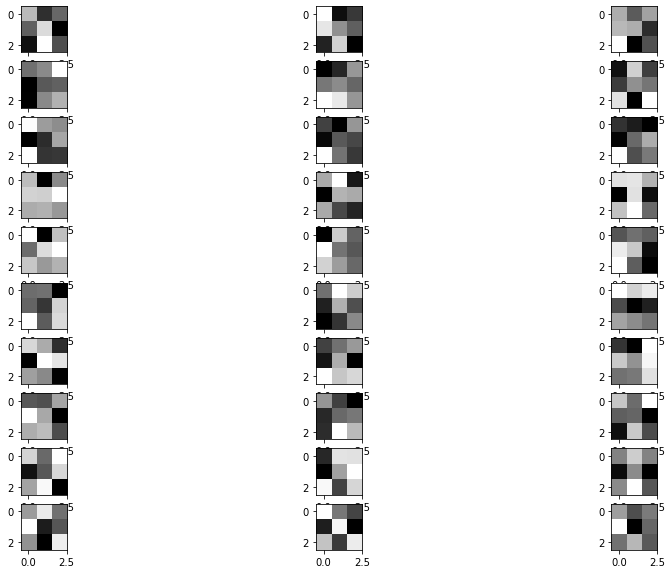

In [89]:
import matplotlib.pyplot as plt
n_filters =10
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

In [90]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [91]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
import numpy as np

image = load_img("/Users/guptatilak/Documents/OneVsRest/sample_val/1/2b75b8692d.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

1/1 [==============================] - 0s 311ms/step


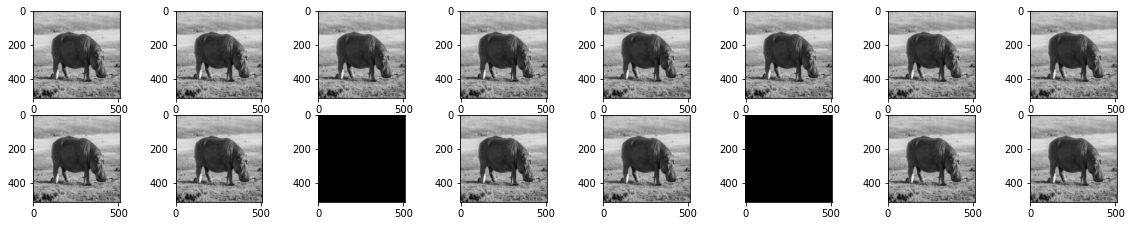

In [92]:
#calculating features_map
features = model.predict(test_image_array)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

1/1 [==============================] - 0s 78ms/step


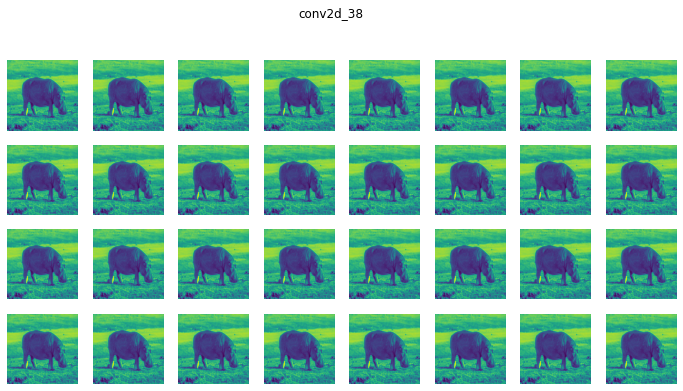

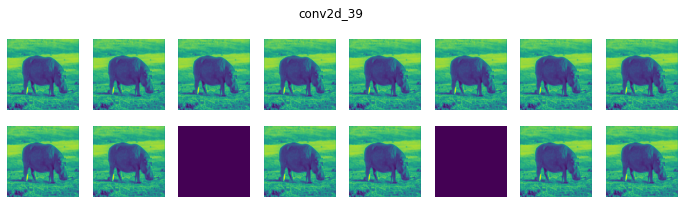

In [93]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D

# Function to visualize the output of convolutional layers
def visualize_conv_layer_outputs(model, image_path, target_size):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Create a model that outputs the activation values for all convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the activation values for the image
    activations = activation_model.predict(img_array)

    # Plot the activation values for each layer
    for layer_name, layer_activation in zip([layer.name for layer in model.layers if isinstance(layer, Conv2D)], activations):
        # Number of filters in the convolutional layer
        n_filters = layer_activation.shape[-1]

        # Create a grid of subplots for each filter
        n_cols = 8
        n_rows = n_filters // n_cols + 1
        plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
        for i in range(n_filters):
            plt.subplot(n_rows, n_cols, i + 1)
            if i < layer_activation.shape[-1]:  # Ensure i is within the valid range
                plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
                plt.axis('off')
        plt.suptitle(layer_name)
        plt.show()

# Choose an image for visualization
image_path = '/Users/guptatilak/Documents/OneVsRest/sample_val/1/2b75b8692d.jpg'
target_size = (512, 512)  # Adjust the target size according to your model's input size


# Visualize the output of convolutional layers
visualize_conv_layer_outputs(model, image_path, target_size)


# Five Class Classification

In [3]:
animal_classes = {
    "mammals": [
        "antelope", "badger", "bear", "bison", "boar", "cat", "chimpanzee", "cow",
        "coyote", "deer", "dog", "dolphin", "donkey", "fox", "goat", "gorilla",
        "hamster", "hare", "hedgehog", "hippopotamus", "horse", "kangaroo", "koala",
        "leopard", "lion", "mouse", "okapi", "orangutan", "otter", "panda", "pig",
        "porcupine", "possum", "raccoon", "rat", "reindeer", "rhinoceros", "seal",
        "sheep", "squirrel", "tiger", "whale", "wolf", "wombat", "zebra", "hyena", "bat", "ox", "elephant"
    ],
    "birds": [
        "hornbill", "hummingbird", "ostrich", "owl", "parrot", "pelecaniformes",
        "penguin", "sandpiper", "sparrow", "swan", "turkey", "woodpecker", "pigeon", "crow", "eagle", "flamingo", "goose", "duck"
    ],
    "insects": [
        "bee", "butterfly", "caterpillar", "cockroach", "grasshopper", "ladybugs", "moth", "dragonfly", "fly", "mosquito", "beetle"
    ],
    "aquatic": [
        "goldfish", "jellyfish", "shark", "seahorse", "starfish", "crab", "squid", "lobster", "oyster", "octopus"
    ],
    "reptiles": [
        "lizard", "snake", "frog", "turtle"
    ]
}


print(animal_classes)


{'mammals': ['antelope', 'badger', 'bear', 'bison', 'boar', 'cat', 'chimpanzee', 'cow', 'coyote', 'deer', 'dog', 'dolphin', 'donkey', 'fox', 'goat', 'gorilla', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'horse', 'kangaroo', 'koala', 'leopard', 'lion', 'mouse', 'okapi', 'orangutan', 'otter', 'panda', 'pig', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'seal', 'sheep', 'squirrel', 'tiger', 'whale', 'wolf', 'wombat', 'zebra', 'hyena', 'bat', 'ox', 'elephant'], 'birds': ['hornbill', 'hummingbird', 'ostrich', 'owl', 'parrot', 'pelecaniformes', 'penguin', 'sandpiper', 'sparrow', 'swan', 'turkey', 'woodpecker', 'pigeon', 'crow', 'eagle', 'flamingo', 'goose', 'duck'], 'insects': ['bee', 'butterfly', 'caterpillar', 'cockroach', 'grasshopper', 'ladybugs', 'moth', 'dragonfly', 'fly', 'mosquito', 'beetle'], 'aquatic': ['goldfish', 'jellyfish', 'shark', 'seahorse', 'starfish', 'crab', 'squid', 'lobster', 'oyster', 'octopus'], 'reptiles': ['lizard', 'snake', 'frog', 'turtle

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator


# Define paths
data_dir = '/Users/guptatilak/Documents/OneVsRest/animals'
batch_size = 32
target_size = (512, 512)



# Initialize lists to store data
image_paths = []
animal_names = []
labels = []

# Traverse through each subfolder (animal category)
for label, animal_folder in enumerate(os.listdir(data_dir)):
    animal_path = os.path.join(data_dir, animal_folder)
    # Skip files that are not directories
    if not os.path.isdir(animal_path):
        continue
    # Iterate over images in the subfolder
    for image_name in os.listdir(animal_path):
        image_paths.append(os.path.join(animal_path, image_name))
        animal_names.append(animal_folder)
        labels.append(label)

# Create a DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'animal_name': animal_names,
    'label': labels
})
# df['image_path'] = df['image_path'].str.replace(r'animals\\', '')

In [5]:
df 

,image_path,animal_name,label
0,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0
1,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0
2,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0
3,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0
4,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0
...,...,...,...
5395,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89
5396,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89
5397,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89
5398,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89


In [6]:
# Function to get animal class
def get_animal_class(animal_name):
    for class_name, animals in animal_classes.items():
        if animal_name in animals:
            return class_name
    return None

# Add a new column with animal class
df['animal_class'] = df['animal_name'].apply(get_animal_class)

df

,image_path,animal_name,label,animal_class
0,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0,mammals
1,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0,mammals
2,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0,mammals
3,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0,mammals
4,/Users/guptatilak/Documents/OneVsRest/animals/...,hippopotamus,0,mammals
...,...,...,...,...
5395,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89,mammals
5396,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89,mammals
5397,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89,mammals
5398,/Users/guptatilak/Documents/OneVsRest/animals/...,possum,89,mammals


# Model architecture for 5 class classification

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Assuming you have defined the loss_function as mentioned earlier
loss_function = tf.keras.losses.CategoricalCrossentropy()

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(512, 512, 3)))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=5, activation='softmax'))  # Changed units to 5 for 5-class classification, and activation to softmax

model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 510, 510, 16)      4624      
                                                                 
 dropout_6 (Dropout)         (None, 510, 510, 16)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 510, 510, 16)      2320      
                                                                 
 conv2d_11 (Conv2D)          (None, 510, 510, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 255, 255, 32)      0         
 g2D)                                                            
                                                      

# Stratified 3 Fold Classification

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import StratifiedKFold

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
    
data_dir = '/Users/guptatilak/Documents/OneVsRest/animals'
    
# Assuming you have a list of all filenames and their corresponding labels
# Replace this with your actual data loading mechanism
all_filenames = df['image_path'].tolist()  # List of all filenames
all_labels = df['animal_class'].tolist()  # List of all corresponding labels

# Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

models=[]

for fold_index, (train_index, val_index) in enumerate(skf.split(all_filenames, all_labels)):
    print(f"Fold {fold_index+1}")
    train_filenames, val_filenames = [all_filenames[i] for i in train_index], [all_filenames[i] for i in val_index]
    train_labels, val_labels = [all_labels[i] for i in train_index], [all_labels[i] for i in val_index]

    train_df = pd.DataFrame({'image_path': train_filenames, 'animal_class': train_labels})
    val_df = pd.DataFrame({'image_path': val_filenames, 'animal_class': val_labels})

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=data_dir,
        x_col='image_path',
        y_col='animal_class',
        target_size=(512, 512),
        batch_size=32,
        class_mode='sparse'  # Corrected class mode for categorical classification
    )
    
    validation_generator = train_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=data_dir,
        x_col='image_path',
        y_col='animal_class',
        target_size=(512, 512),
        batch_size=32,
        class_mode='sparse'  # Corrected class mode for categorical classification
    )
    

    # Assuming you have already defined and compiled your model
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer = Adam()

    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    # Fit the model for this fold
    model.fit_generator(train_generator, epochs=5, validation_data=validation_generator)
    models.append(model)


Fold 1
Found 3600 validated image filenames belonging to 5 classes.
Found 1800 validated image filenames belonging to 5 classes.


/var/folders/vy/hqlqcg292rj1msf91q8wjp_40000gn/T/ipykernel_29071/2614531553.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
113/113 [==============================] - 610s 5s/step - loss: 377.8712 - accuracy: 0.3364 - val_loss: 347.3720 - val_accuracy: 0.5444
Epoch 2/5
113/113 [==============================] - 582s 5s/step - loss: 3726.3030 - accuracy: 0.3531 - val_loss: 622.3378 - val_accuracy: 0.5444
Epoch 3/5
113/113 [==============================] - 570s 5s/step - loss: 8866.0068 - accuracy: 0.3219 - val_loss: 3453.3291 - val_accuracy: 0.5444
Epoch 4/5
113/113 [==============================] - 542s 5s/step - loss: 2250.5833 - accuracy: 0.3750 - val_loss: 60.0652 - val_accuracy: 0.4050
Epoch 5/5
113/113 [==============================] - 563s 5s/step - loss: 1266.9543 - accuracy: 0.3503 - val_loss: 176.0521 - val_accuracy: 0.3656
Fold 2
Found 3600 validated image filenames belonging to 5 classes.
Found 1800 validated image filenames belonging to 5 classes.


/var/folders/vy/hqlqcg292rj1msf91q8wjp_40000gn/T/ipykernel_29071/2614531553.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
113/113 [==============================] - 444s 4s/step - loss: 1196.5917 - accuracy: 0.3514 - val_loss: 338.0544 - val_accuracy: 0.1978
Epoch 2/5
113/113 [==============================] - 456s 4s/step - loss: 7186.8354 - accuracy: 0.3733 - val_loss: 1785.2961 - val_accuracy: 0.5444
Epoch 3/5
113/113 [==============================] - 483s 4s/step - loss: 19818.6992 - accuracy: 0.3728 - val_loss: 2501.9456 - val_accuracy: 0.5444
Epoch 4/5
113/113 [==============================] - 507s 4s/step - loss: 18056.8848 - accuracy: 0.3594 - val_loss: 3442.8545 - val_accuracy: 0.5444
Epoch 5/5
113/113 [==============================] - 457s 4s/step - loss: 16341.0635 - accuracy: 0.3539 - val_loss: 479.2081 - val_accuracy: 0.5444
Fold 3
Found 3600 validated image filenames belonging to 5 classes.
Found 1800 validated image filenames belonging to 5 classes.


/var/folders/vy/hqlqcg292rj1msf91q8wjp_40000gn/T/ipykernel_29071/2614531553.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
113/113 [==============================] - 471s 4s/step - loss: 12890.3896 - accuracy: 0.3658 - val_loss: 3539.4922 - val_accuracy: 0.5444
Epoch 2/5
113/113 [==============================] - 544s 5s/step - loss: 45980.0938 - accuracy: 0.3647 - val_loss: 13684.7373 - val_accuracy: 0.5444
Epoch 3/5
113/113 [==============================] - 568s 5s/step - loss: 152558.2188 - accuracy: 0.3756 - val_loss: 19114.8281 - val_accuracy: 0.5444
Epoch 4/5
113/113 [==============================] - 539s 5s/step - loss: 113549.9609 - accuracy: 0.3422 - val_loss: 13015.3496 - val_accuracy: 0.1789
Epoch 5/5
113/113 [==============================] - 497s 4s/step - loss: 72929.5234 - accuracy: 0.3633 - val_loss: 13772.5957 - val_accuracy: 0.5450


# Classification Metrics for visualization

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Assuming you have a test dataset and corresponding labels
test_df=df.sample(1000)
test_filenames = test_df['image_path'].tolist()  # List of test filenames
test_labels = test_df['animal_class'].tolist()  # List of corresponding test labels

# Initialize empty lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model trained using k-fold cross-validation
for model in models:
    # Make predictions on the test dataset
    test_generator = train_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=data_dir,
        x_col='image_path',
        y_col='animal_class',
        target_size=(512, 512),
        batch_size=32,
        class_mode='sparse',
        shuffle=False  # Important to keep the order of predictions consistent with labels
    )
    
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    
    from sklearn.preprocessing import LabelEncoder

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit label encoder and transform labels
    encoded_labels = label_encoder.fit_transform(test_labels)

    # Replace original labels in DataFrame with encoded labels
    test_labels = encoded_labels

    # If you want to inverse transform the labels back to original form later:
    # original_labels = label_encoder.inverse_transform(encoded_labels)

    
    # Calculate evaluation metrics
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = precision_score(test_labels, predicted_labels, average='macro')
    recall = recall_score(test_labels, predicted_labels, average='macro')
    f1 = f1_score(test_labels, predicted_labels, average='macro')
    
    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate mean of evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print overall assessment metrics
print("Overall Assessment Metrics:")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-score: {mean_f1}")


Found 1000 validated image filenames belonging to 5 classes.
32/32 [==============================] - 27s 845ms/step
Found 1000 validated image filenames belonging to 5 classes.


/Users/guptatilak/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 27s 844ms/step
Found 1000 validated image filenames belonging to 5 classes.


/Users/guptatilak/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 27s 834ms/step
Overall Assessment Metrics:
Mean Accuracy: 0.545
Mean Precision: 0.10900000000000003
Mean Recall: 0.20000000000000004
Mean F1-score: 0.1411003236245955


/Users/guptatilak/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Convolutional Layer Visualization

1/1 [==============================] - 0s 58ms/step


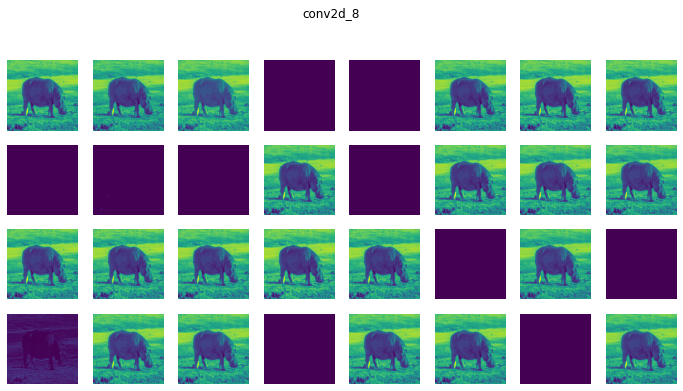

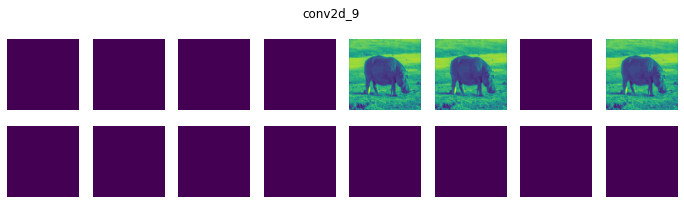

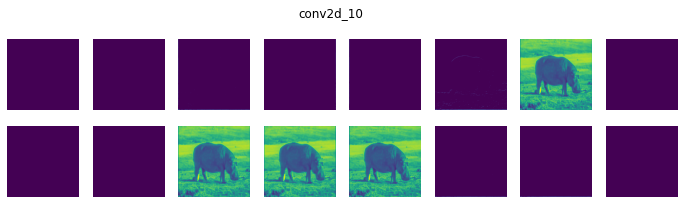

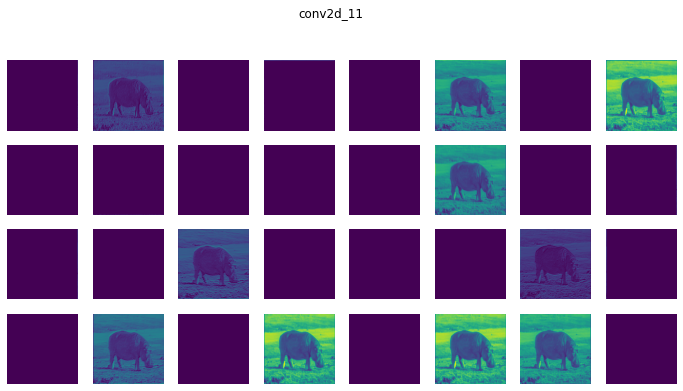

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D

# Function to visualize the output of convolutional layers
def visualize_conv_layer_outputs(model, image_path, target_size):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Create a model that outputs the activation values for all convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the activation values for the image
    activations = activation_model.predict(img_array)

    # Plot the activation values for each layer
    for layer_name, layer_activation in zip([layer.name for layer in model.layers if isinstance(layer, Conv2D)], activations):
        # Number of filters in the convolutional layer
        n_filters = layer_activation.shape[-1]

        # Create a grid of subplots for each filter
        n_cols = 8
        n_rows = n_filters // n_cols + 1
        plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
        for i in range(n_filters):
            plt.subplot(n_rows, n_cols, i + 1)
            if i < layer_activation.shape[-1]:  # Ensure i is within the valid range
                plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
                plt.axis('off')
        plt.suptitle(layer_name)
        plt.show()

# Choose an image for visualization
image_path = '/Users/guptatilak/Documents/OneVsRest/sample_val/1/2b75b8692d.jpg'
target_size = (512, 512)  # Adjust the target size according to your model's input size


# Visualize the output of convolutional layers
visualize_conv_layer_outputs(models[0], image_path, target_size)
